<a href="https://colab.research.google.com/github/Kourosh76/Data-Analysis-Projects/blob/main/Chocolate_Factory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chocolate Factory

<img src="https://food.fnr.sndimg.com/content/dam/images/food/fullset/2022/04/12/fn_healthy-chocolate-getty_s4x3.jpg.rend.hgtvcom.1280.960.suffix/1649787692492.jpeg" width="500">

In this project, we go to the challenges of selling chocolate business.

This project consists of $3$ main steps:
1. In the first step, we will review and analyze a data frame including all the chocolates we have.
2. In the second step, we try to identify salable chocolates and determine their prices by checking the types of chocolates.
3. In the third step, we try to identify the best chocolate companies and update the price of chocolates accordingly. In addition, we are going to calculate the income from the sale of such chocolates.


## Outline

- [Step 1: Exploratory Data Analysis (EDA)](#scrollTo=yIOVWkTUnPsJ)
- [Step 2: Salable Chocolates and Determine their Prices](#scrollTo=_yVKsMfqIsQR)
- [Step 3: Best Chocolate Companies](#scrollTo=6aKU0igOh2pI)

In [ ]:
# import necessary libraries and functions

# to work with numeric data
import numpy as np

# to work with data sets
import pandas as pd

# to plot charts
import seaborn as sns

# set the default theme of seaborn
sns.set_theme()

# to ignore warnings
import warnings

warnings.filterwarnings("ignore")

## Step 1: Exploratory Data Analysis (EDA)

In the first step of the project, suppose we received a large shipment of foreign chocolates and the seller provided us with a complete list of specifications for each chocolate. Now we want to further examine these specifications and improve part of the storage structure of this information.

In [ ]:
# read the dataframe
df = pd.read_csv("chocolate.csv")
# display data of first 5 rows of the dataframe
df.head()

,Company,Specific Bean\nOrigin,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,Blend,Peru


In [ ]:
# shape of the dataframe (#rows, #columns)
s = df.shape
# name of the columns in the dataframe
cols = df.columns

print(s)
print(cols)

(1795, 8)
Index(['Company', 'Specific Bean\nOrigin', 'Review\nDate', 'Cocoa\nPercent',
       'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')


As you can see, some column names have the ``\n`` character, which is used to create a new line, but is not displayed here. Therefore, to sort the data set, we change the names of the columns so that instead of the ``\n`` character, only spaces are used.

In [ ]:
# remove \n character from the names of the columns
df.columns = df.columns.str.replace("\n", " ")
df.columns

Index(['Company', 'Specific Bean Origin', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [ ]:
# display the number of missing data in each column
df.isna().sum()

Company                 0
Specific Bean Origin    0
Review Date             0
Cocoa Percent           0
Company Location        0
Rating                  0
Bean Type               0
Broad Bean Origin       1
dtype: int64

In this dataset, there is only one missing data, which is in the column ``Broad Bean Origin``.

In [ ]:
# display information about the data set and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   object 
 4   Company Location      1795 non-null   object 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   object 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


The data type of all columns that have string values (such as the ``Company`` column) is stored as ``object``, which does not need to remain as ``object`` due to the absence of any missing values (except for the ``Broad Bean Origin`` column that has one missing value). Therefore, for the convenience of calculations, we change the data type of these columns to string type.

In [ ]:
# change the data type of the columns
df = df.astype(
    {
        "Company": "string",
        "Specific Bean Origin": "string",
        "Cocoa Percent": "string",
        "Company Location": "string",
        "Bean Type": "string",
    }
)

# display information about the data set and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   string 
 1   Specific Bean Origin  1795 non-null   string 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   string 
 4   Company Location      1795 non-null   string 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   string 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(1), object(1), string(5)
memory usage: 112.3+ KB


Also, two columns ``Review Date`` and ``Rating`` of this data set have numerical data. To optimize and reduce the memory consumption of this data set, we calculate the minimum and maximum data of each of these two columns and limit the data type of these columns to the minimum required range.

In [ ]:
# display information from two columns Review Date and Rating
df.loc[:, ["Review Date", "Rating"]].describe()

,Review Date,Rating
count,1795.000000,1795.000000
mean,2012.325348,3.185933
std,2.927210,0.478062
min,2006.000000,1.000000
25%,2010.000000,2.875000
50%,2013.000000,3.250000
75%,2015.000000,3.500000
max,2017.000000,5.000000


According to the ``min`` and ``max`` values for these two columns, the ``int16`` data type is sufficient for the ``Review Date`` column and the ``float16`` data type is sufficient for the ``Rating`` column.

> **Note**: Due to calculations in [[14]](#scrollTo=TVFErtvuLQWX) and values exceeding the range of ``float16``, we set the data type of column ``Rating`` to ``float32``.

In [ ]:
# change the data type of the columns
df = df.astype({"Review Date": np.int16, "Rating": np.float32})
# display information about the data set and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   string 
 1   Specific Bean Origin  1795 non-null   string 
 2   Review Date           1795 non-null   int16  
 3   Cocoa Percent         1795 non-null   string 
 4   Company Location      1795 non-null   string 
 5   Rating                1795 non-null   float32
 6   Bean Type             1795 non-null   string 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float32(1), int16(1), object(1), string(5)
memory usage: 94.8+ KB


The next problem is the ``Cocoa Percent`` column. As you can see, this column is currently stored as a string, but the original values are numeric because it's easier to use the information in this case. Therefore, to better normalize this column, we remove the ``%`` from the end of its values and then convert it to ``float``.
> **Note**: Because the values of this column show the percentage, so data type ``float16`` is enough for it.

In [ ]:
# remove % from Cocoa Percent column and convert its data type from string to float16
df["Cocoa Percent"] = df["Cocoa Percent"].str.replace("%", "").astype(np.float16)
# display information about the data set and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   string 
 1   Specific Bean Origin  1795 non-null   string 
 2   Review Date           1795 non-null   int16  
 3   Cocoa Percent         1795 non-null   float16
 4   Company Location      1795 non-null   string 
 5   Rating                1795 non-null   float32
 6   Bean Type             1795 non-null   string 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float16(1), float32(1), int16(1), object(1), string(4)
memory usage: 84.3+ KB


Here we want to use the histogram chart to check the percentage of cocoa in different chocolates.

> **Note**: Here we use [Freedman–Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) rule to select the number of bins in the histogram.

In [ ]:
def number_of_bins(sample):
    """
    use Freedman–Diaconis rule to calculate optimal number of bins in a histogram
    """
    # minimum data in our sample
    minimum_data = np.min(sample)
    # maximum data in our sample
    maximum_data = np.max(sample)

    # 1st quartile
    Q1 = np.quantile(sample, 0.25)
    # 3rd quartile
    Q3 = np.quantile(sample, 0.75)
    # interquartile range
    IQR = Q3 - Q1

    # number of observations in our sample
    n = len(sample)

    # optimal number of bins
    N = int((maximum_data - minimum_data) / (2 * IQR) * np.cbrt(n))

    return N

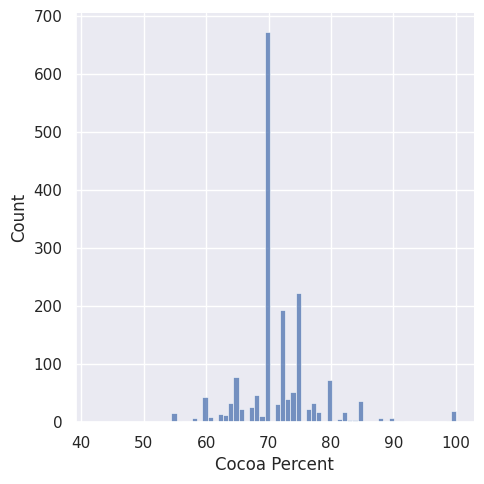

In [ ]:
# plot the histogram
sns.displot(df, x="Cocoa Percent", bins=number_of_bins(df["Cocoa Percent"]));

By checking the chart above, it is clear that a large percentage of chocolates have $70\%$ cocoa.

## Step 2: Salable Chocolates and Determine their Prices

At this stage of the project, we are going to determine the price of chocolates according to some specifications of chocolates and the research we have done. For this, we use the data that we have processed in the previous step and then we try to improve our price estimate step by step.

After a little research, we found out that the price of a chocolate has a direct relationship with the percentage of its rating by experts. Currently, these ratings are present in our data set (column ``Rating``) but not as percentages! Therefore, we want to scale these values so that the highest score is $100$.

In [ ]:
# scale the Rating of the data frame
df["Rating"] = df["Rating"] * 100 / np.max(df["Rating"])

# display data of first 5 rows of the dataframe
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,75.0,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,55.0,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,60.0,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,70.0,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,70.0,Blend,Peru


After some research, it was found that the price of $100 \, g$ of pure cocoa with the highest quality is $250000$ Tomans. To calculate the price of $100 \, g$ of each chocolate, we add a column named ``price(100g)`` to the data set to show this value. To calculate this value, we use the following equation:
$$\text{Price per 100g} = 25 \times \text{Rating} \times \text{Cocoa Percent}$$

In [ ]:
# calulate the price per 100g for each chocolate
df["price(100g)"] = 25 * df["Rating"] * df["Cocoa Percent"]

# display data of first 5 rows of the dataframe
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,A. Morin,Agua Grande,2016,63.0,France,75.0,Blend,Sao Tome,118125.0
1,A. Morin,Kpime,2015,70.0,France,55.0,Blend,Togo,96250.0
2,A. Morin,Atsane,2015,70.0,France,60.0,Blend,Togo,105000.0
3,A. Morin,Akata,2015,70.0,France,70.0,Blend,Togo,122500.0
4,A. Morin,Quilla,2015,70.0,France,70.0,Blend,Peru,122500.0


What we did in the previous cell was to estimate the price of chocolates using regression. Now we want to check the relationship between weight and price of chocolates. For this, we use the ``regplot`` function to display the relationship between these two variables.

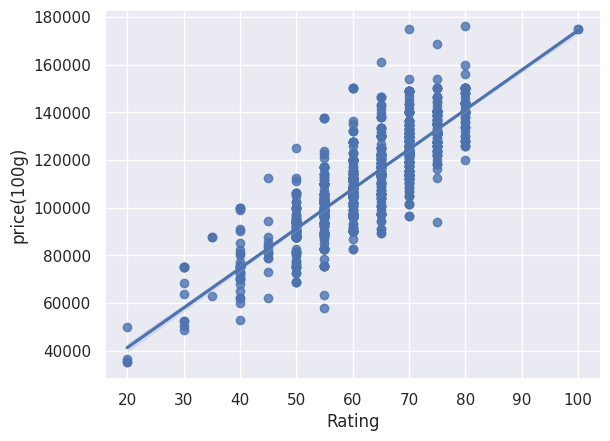

In [ ]:
# plot the chart
sns.regplot(x=df["Rating"], y=df["price(100g)"]);

As you can see in the graph, there is a linear relationship between the rating and the price of cocoa, and with this line you can calculate the price of chocolates without price.

Suppose we find that dark chocolate is more expensive and more profitable. So we are going to check only this type of chocolate. In this section, we consider chocolates whose cocoa percentage is more than $70\%$ as dark chocolate and store them in a new data set named ``dark_chocolates``.

In [ ]:
# filter the data set
dark_chocolates = df[df["Cocoa Percent"] > 70].reset_index(drop=True)
# display the filtered data set
dark_chocolates

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,Adi,"Vanua Levu, Toto-A",2011,80.0,Fiji,65.0,Trinitario,Fiji,130000.0
1,Adi,Vanua Levu,2011,88.0,Fiji,70.0,Trinitario,Fiji,154000.0
2,Adi,"Vanua Levu, Ami-Ami-CA",2011,72.0,Fiji,70.0,Trinitario,Fiji,126000.0
3,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",2011,75.0,Switzerland,75.0,Trinitario,Indonesia,140625.0
4,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",2010,75.0,Switzerland,55.0,Criollo,Madagascar,103125.0
...,...,...,...,...,...,...,...,...,...
790,Zotter,Raw,2014,80.0,Austria,55.0,Blend,Other,110000.0
791,Zotter,"Bocas del Toro, Cocabo Co-op",2012,72.0,Austria,70.0,Blend,Panama,126000.0
792,Zotter,El Oro,2012,75.0,Austria,60.0,Forastero (Nacional),Ecuador,112500.0
793,Zotter,Huiwani Coop,2012,75.0,Austria,60.0,"Criollo, Trinitario",Papua New Guinea,112500.0


The type of grain used to make chocolate has a direct effect on its quality. For example, one of the best chocolate beans is ``Trinitario``. For this reason, we have decided to increase the price of dark chocolates in the ``dark_chocolates`` dataframe that use this grain by $10\%$.

In [ ]:
# make a mask of dark chocolates in the data set that have Trinitario
has_Trinitario = dark_chocolates["Bean Type"].str.contains("Trinitario")

# increase price of the dark chocolates by 10%
dark_chocolates["price(100g)"][has_Trinitario] = (
    dark_chocolates["price(100g)"][has_Trinitario] * 1.1
)

Now we want to know how much in total we get from the sale of these dark chocolates at the prices we have specified.

In [ ]:
priceSum = np.sum(dark_chocolates["price(100g)"])
priceSum

96733660.0

## Step 3: Best Chocolate Companies

Suppose that after trying some regular (non-dark) chocolates, we realize that many of them are also delicious, and if we can find better quality ones, they will probably sell well. So, in the last step of the project, we want to identify companies that produce higher quality chocolates and separate their chocolates.

In [ ]:
# filter the data set for regular chocolates
df = df[df["Cocoa Percent"] <= 70].reset_index(drop=True)

# display data of first 5 rows of the dataframe
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,A. Morin,Agua Grande,2016,63.0,France,75.0,Blend,Sao Tome,118125.0
1,A. Morin,Kpime,2015,70.0,France,55.0,Blend,Togo,96250.0
2,A. Morin,Atsane,2015,70.0,France,60.0,Blend,Togo,105000.0
3,A. Morin,Akata,2015,70.0,France,70.0,Blend,Togo,122500.0
4,A. Morin,Quilla,2015,70.0,France,70.0,Blend,Peru,122500.0


First, for each chocolate company, we calculate the average score of chocolates for each year and store the average score value of each company per year.

In [ ]:
companies = df.groupby(["Company", "Review Date"])["Rating"].mean().unstack()

# remove columns header name
companies.columns.name = None
# remove indices header name
companies.index.name = None

companies

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
A. Morin,NaN,NaN,NaN,NaN,NaN,NaN,72.500000,66.36364,70.0,63.75,75.0,NaN
AMMA,NaN,NaN,NaN,NaN,77.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acalli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,NaN,NaN
Adi,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN
Aequare (Gianduja),NaN,NaN,NaN,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Zokoko,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,65.0,NaN
Zotter,NaN,NaN,NaN,NaN,60.0,67.5,69.285713,NaN,NaN,NaN,NaN,NaN
hello cocoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.00,NaN,NaN
hexx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,NaN,NaN


To calculate the best companies, we do not need to use the value of all years; Therefore, first we calculate the average of the columns of the ``companies`` from $2012$ onwards for each company, then we calculate the top $10$ companies along with their average rank. (In cases where the scores of the companies are equal, we arrange the companies in alphabetical order.)

In [ ]:
# calculate the average of the columns of the companies from 2012 onwards for each company
mean_ratings = np.mean(companies.loc[:, "2012":], axis=1)
mean_ratings

A. Morin                  69.522728
AMMA                            NaN
Acalli                    75.000000
Adi                             NaN
Aequare (Gianduja)              NaN
                            ...    
Zokoko                    65.000000
Zotter                    69.285713
hello cocoa               55.000000
hexx                      60.000000
twenty-four blackbirds    65.000000
Length: 313, dtype: float32

In [ ]:
# calculate the top  10  companies along with their average rank
best_ratings = mean_ratings.sort_values(ascending=False, kind="stable").head(10)
best_ratings

Patric                     80.000000
Tobago Estate (Pralus)     80.000000
Willie's Cacao             80.000000
L.A. Burdick (Felchlin)    77.500000
Matale                     77.500000
Pacari                     77.500000
Valrhona                   76.666664
Acalli                     75.000000
Amedei                     75.000000
Askinosie                  75.000000
dtype: float32

Now we select the chocolates whose manufacturing company is among the top $10$ companies from the ``df`` data frame.

In [ ]:
chocolates_to_sell = df[df["Company"].isin(best_ratings.index)]
chocolates_to_sell

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
23,Acalli,"Chulucanas, El Platanal",2015,70.0,U.S.A.,75.0,Blend,Peru,131250.0
24,Acalli,"Tumbes, Norandino",2015,70.0,U.S.A.,75.0,Criollo,Peru,131250.0
59,Amedei,"Piura, Blanco de Criollo",2012,70.0,Italy,75.0,Blend,Peru,131250.0
60,Amedei,Porcelana,2007,70.0,Italy,80.0,Criollo (Porcelana),Venezuela,140000.0
61,Amedei,Chuao,2007,70.0,Italy,100.0,Trinitario,Venezuela,175000.0
62,Amedei,Ecuador,2007,70.0,Italy,60.0,Trinitario,Ecuador,105000.0
63,Amedei,Jamaica,2007,70.0,Italy,60.0,Trinitario,Jamaica,105000.0
64,Amedei,Grenada,2007,70.0,Italy,70.0,Trinitario,Grenada,122500.0
65,Amedei,Venezuela,2007,70.0,Italy,75.0,Trinitario (85% Criollo),Venezuela,131250.0
66,Amedei,Madagascar,2007,70.0,Italy,80.0,Trinitario (85% Criollo),Madagascar,140000.0


Finally, we calculate the total price of these chocolates to determine the total amount received from these chocolates.

In [ ]:
priceSum = np.sum(chocolates_to_sell["price(100g)"])
priceSum

7282125.0